## Prepared by:

Nazzeef Nazri

a1621410

# Assessment 2 (Random Forest Regressor)

This notebook will demonstrate the application of machine learning pipeline on a regression problem using the **insurance dataset** obtained from Kaggle (Choi 2018). 

The machine learning pipeline has six main steps:
 1. Problem definition where you define your problem;
 2. Data ingestion where you collect your data;
 3. Data preparation where you clean your data;
 4. Data segregation where you separate your data;
 5. Model training where you use the machine learning algorithms; 
 6. Candidate model evaluation where you evaluate the models you have used.
 
## Step 1: Problem definition

We want to write a Machine Learning program that predicts the medical costs billed by the beneficiaries' of a particular health insurance. In doing so, we will explore different models and compare their performance against a baseline.  

In this notebook, we will explore Random Forest Regressor.  

## Step 2: Data Ingestion - The data set

The insurance dataset represents various characteristics of 1338 beneficiaries of a particular health insurance.

This dataset has 6 baseline variables:
* **age**: The age of primary beneficiary
* **sex**: The gender of primary beneficiary, namely, Male or Female. 
* **bmi**: The primary beneficiary's body mass index
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Whether the primary beneficiary is a smoker or not
* **region**: the beneficiary's residential area in the US, namely, Northeast, Southeast, Southwest, Northwest.

of 1338 beneficiaries of insurance. 

It also contains the individual medical costs billed by their health insurance (target). 

In [1]:
#libraries 
import numpy as np 
import pandas as pd

# For plotting, seaborn will be used
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Set seaborn up as the default environment
sns.set()

In [2]:
# Loading insurance dataset
df_insurance = pd.read_csv('insurance.csv')

# Looking at the shape of the dataset
df_insurance.shape

print('The dataset has', df_insurance.shape[0],'n_samples and', df_insurance.shape[1], 'n_features')

The dataset has 1338 n_samples and 7 n_features


In [3]:
# Checking the dataset
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Step 3: Data preparation

We will perform a quick check and address any anomalies (if any). In essence, we want to ensure that the data is:
1. Currency 
   * Data is up to date (not an issue for this scenario). 
2. Consistency
   * Data is usable. There are no data format/irregularities, spelling/typos, domain format errors or use of special characters (syntactical anomalies). 
3. Accurate
   * Data is not wrong. There are no duplicates, invalid observations or contradictions (semantic anomalies). 
4. Complete
   * There are no missing values (coverage anomalies)

#### 3.1 Checking if there are any missing values (coverage anomalies)

In [7]:
# Checking if there are any missing values
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Based on the above, there are no missing values. 

#### 3.2 Checking if there are any duplicated values (semantic anomalies)

In [8]:
# Checking if there are any duplicated values
df_insurance.duplicated().sum()

1

In [9]:
# We will drop the duplicated value
df_insurance.drop_duplicates(inplace = True)

In [10]:
# Double-check that duplicated value has been removed
df_insurance.duplicated().sum()

0

Based on the above, there is 1 duplicated value. Accordingly, we have removed the duplicated value. 

#### 3.3 Checking for any irregularites such as spelling, etc (syntactical anomalies)

In [11]:
df_insurance['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [12]:
df_insurance['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [13]:
df_insurance['smoker'].value_counts() 

no     1063
yes     274
Name: smoker, dtype: int64

Based on the above, there are no syntactical anomalies detected. 

#### 3.4 Creating dummies for categorical variables

We will assign numerical values for categorical variables (i.e region, sex and smoker) which enables us to feed them into our models. 

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_insurance["sex"] = le.fit_transform(df_insurance["sex"])
df_insurance["sex"].head()

# Male = 1
# Female = 0

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [15]:
df_insurance["smoker"] = le.fit_transform(df_insurance["smoker"])
df_insurance["smoker"].head()

# smoker = 1
# non-smoker = 0

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [16]:
dummy_region = pd.get_dummies(df_insurance[["region"]])
dummy_region.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [17]:
# Combining dummy_region to the master dataframe, df_insurance

df_insurance = pd.concat([df_insurance, dummy_region], axis=1)

# Dropping region from df_insurance
df_insurance.drop(columns=["region"], inplace=True)

df_insurance.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


#### 3.5 Checking if there are any outliers

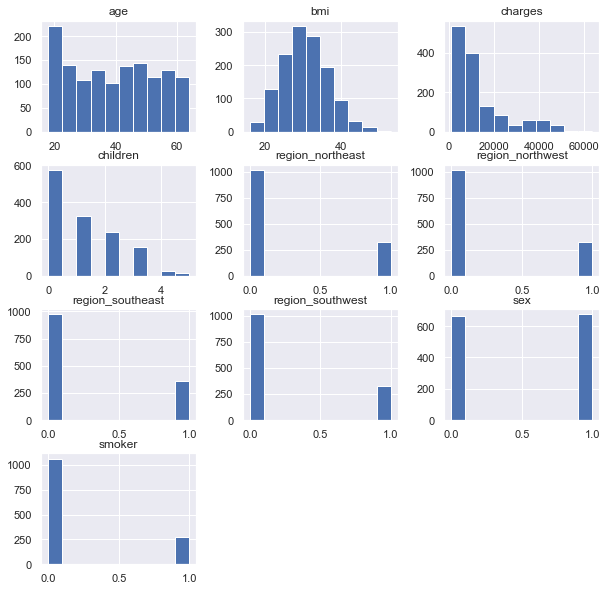

In [18]:
df_insurance.hist(figsize=(10,10))
plt.show()

There are no outliers detected.

Let's take a closer look at the distribution of age, bmi, children and charges. 

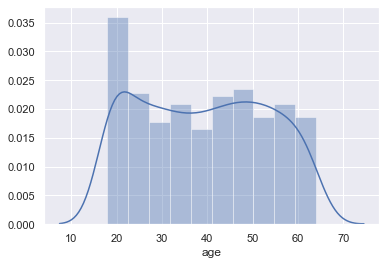

In [19]:
# Age

sns.distplot(df_insurance.age, bins= 10)

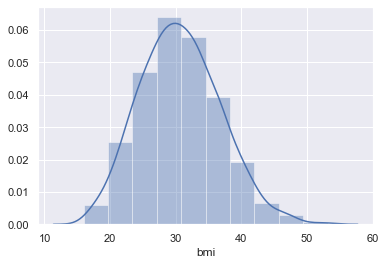

In [20]:
# BMI

sns.distplot(df_insurance.bmi, bins= 10)

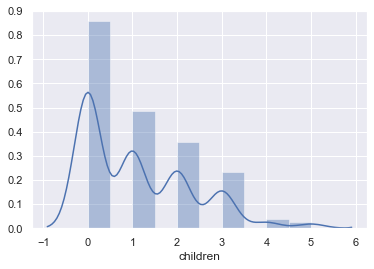

In [21]:
# Number of children

sns.distplot(df_insurance.children, bins= 10)

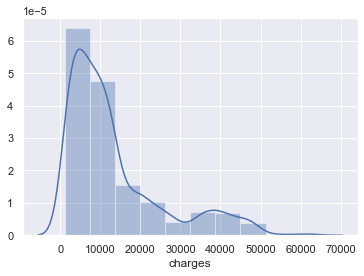

In [22]:
# Charges

sns.distplot(df_insurance.charges, bins= 10)

Based on the above, children and charges are right skewed whereas age and BMI are normally distributed. 

#### 3.6 Feature engineering

#### 3.6.1 Feature filtering

We will use Pearson's correlation in order to draw a heatmap and assess which variables are more correlated to the target variable in order to feed our model. 

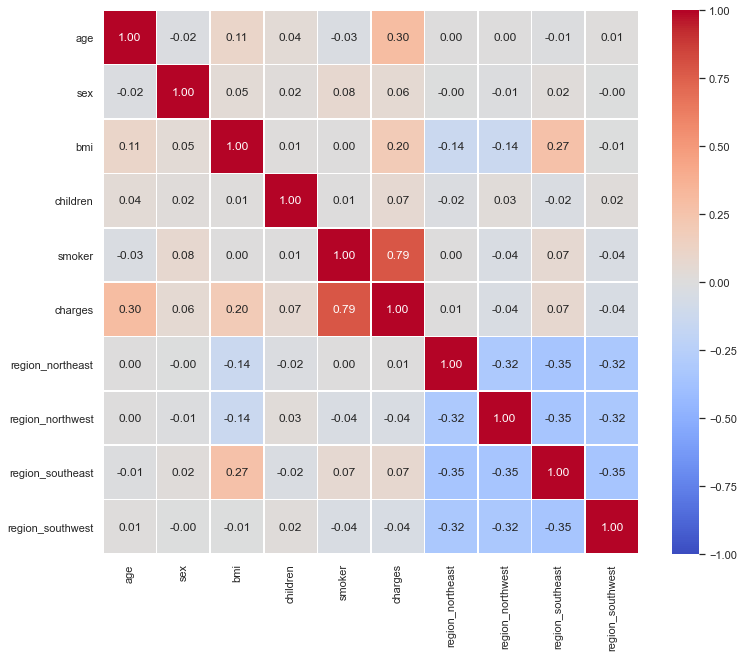

In [23]:
correlation_matrix = df_insurance.corr() 

plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot = True, fmt='.2f', linewidths=.5, cmap = "coolwarm", vmin=-1, vmax=1)

Only the feature 'smoker' is highly correlated (i.e over the absolute value of 0.7) with charges, whereas the others are not. Since we do not have that many variable to begin with, all features will be used as we want to avoid underfitting the model. 

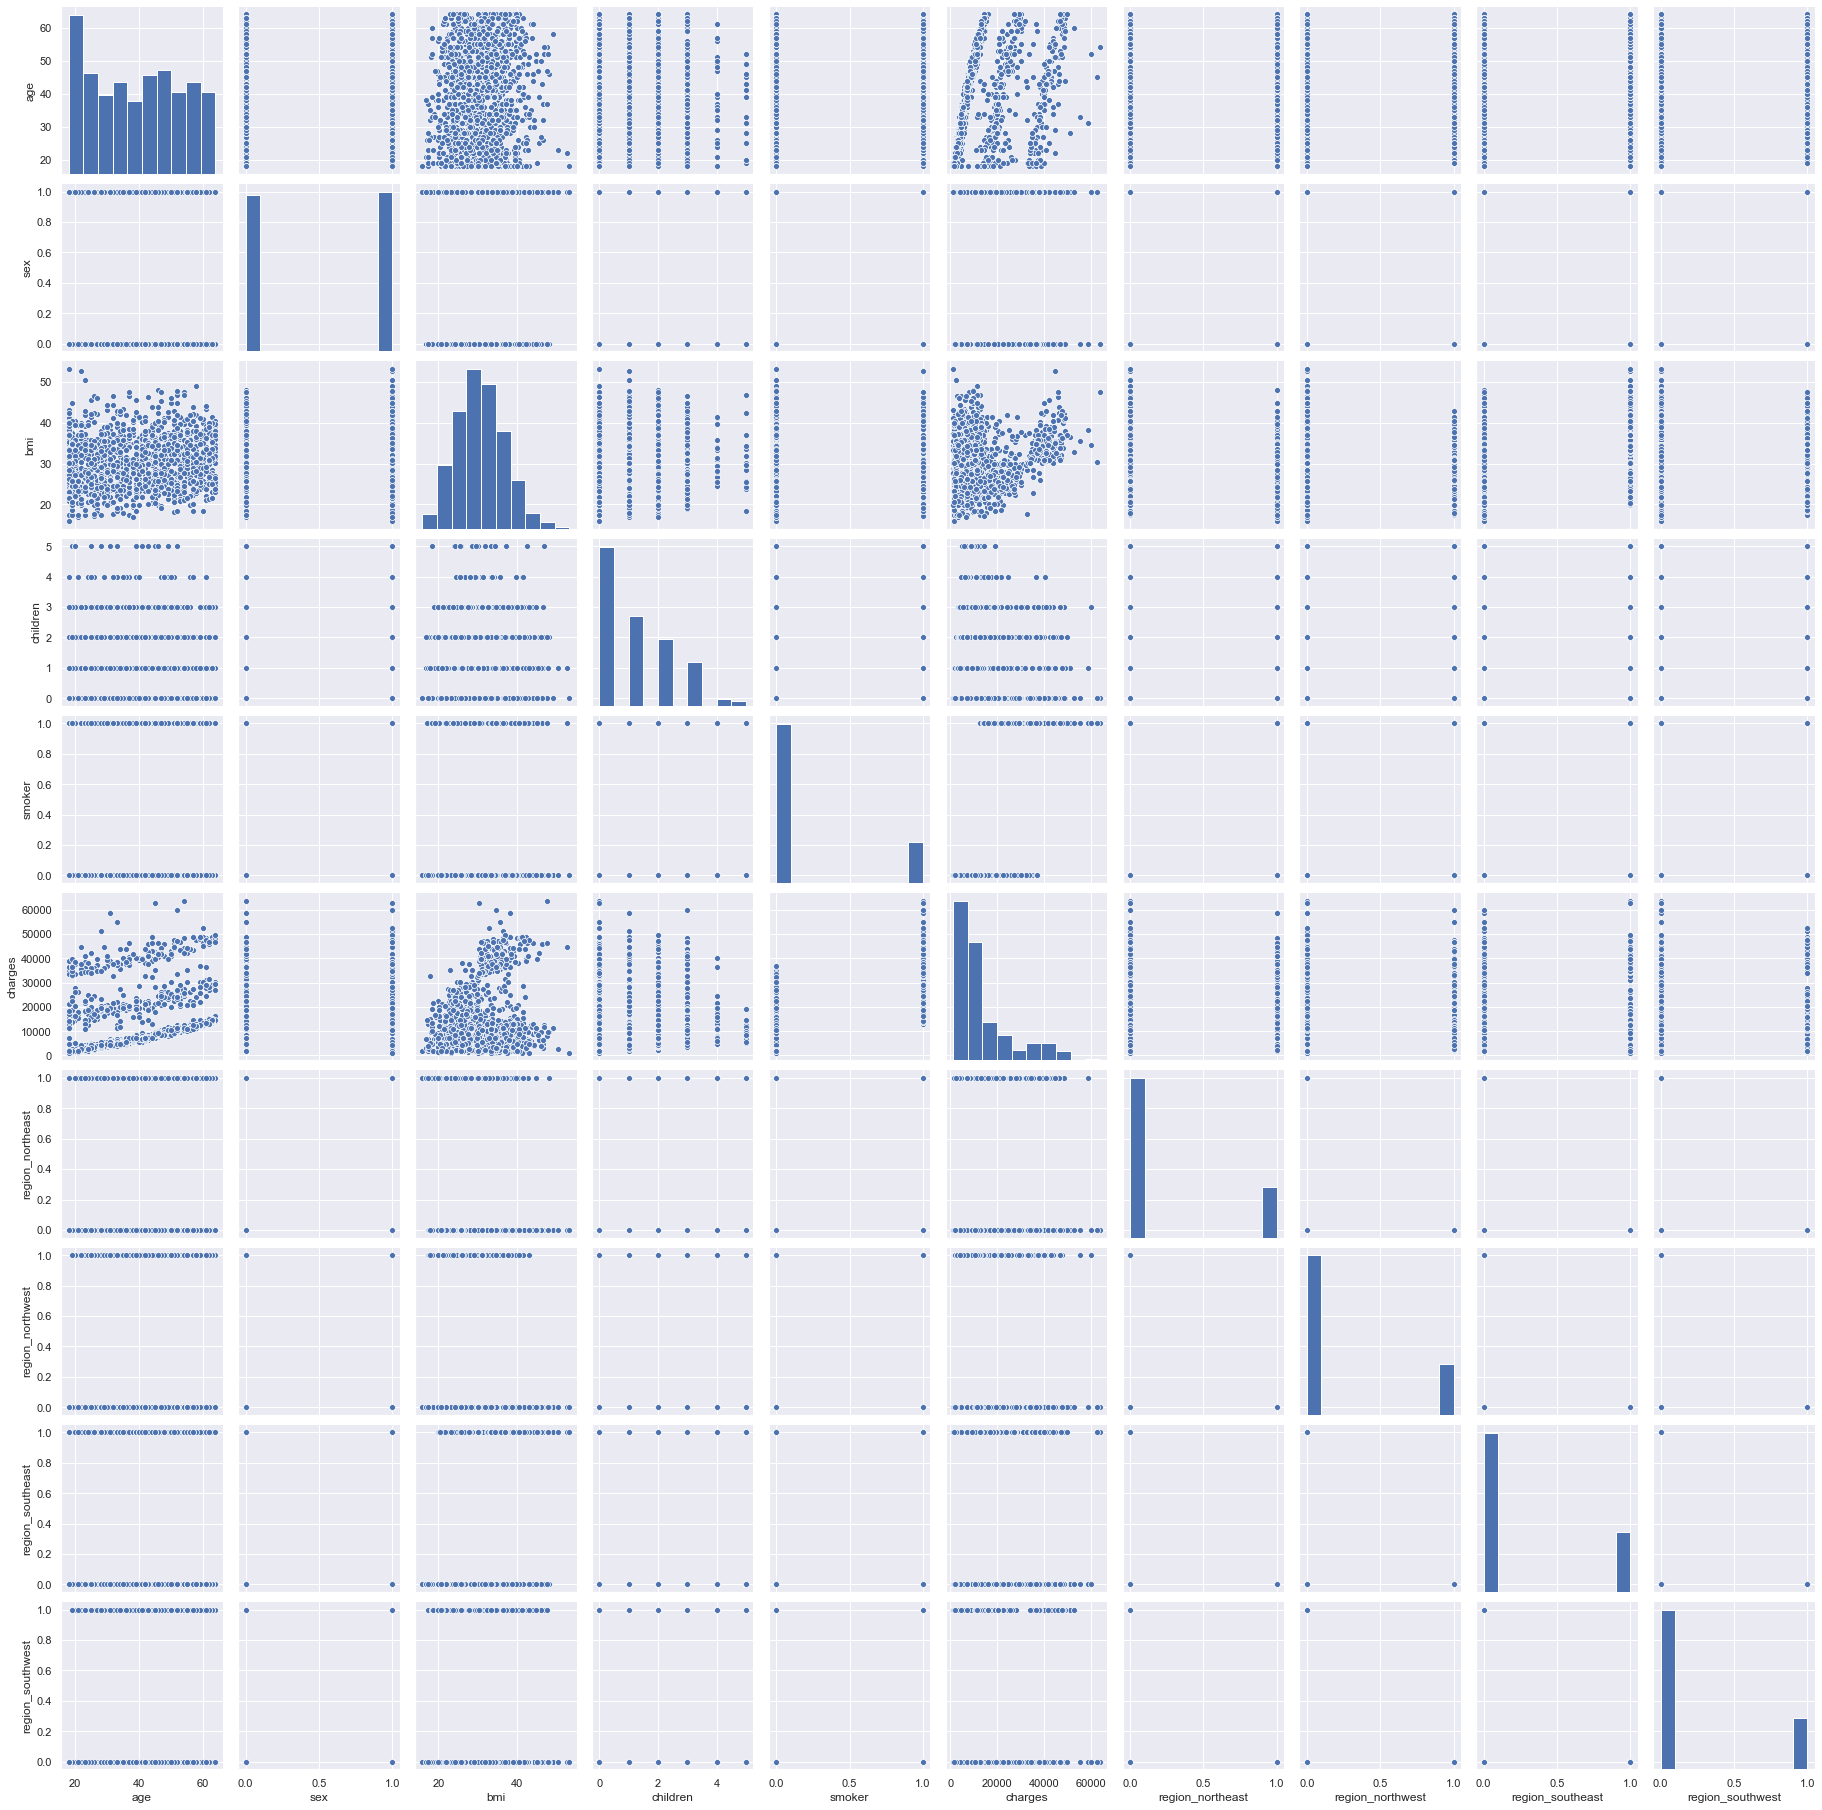

In [24]:
sns.pairplot(df_insurance)

Based on the above, majority of the variables have a non-linear relationship with the target variable, charges.

#### 3.6.2 Store the target and the features that will feed the models

In [25]:
# We will store all the features from the data into the variable X

X = pd.DataFrame(np.c_[df_insurance.age, df_insurance.sex, df_insurance.bmi, df_insurance.children, 
                      df_insurance.smoker, df_insurance.region_northeast, df_insurance.region_northwest,
                      df_insurance.region_southeast, df_insurance.region_southwest], columns=['age','sex', 'bmi', 'children', 
                      'smoker', 'northeast', 'northwest','southeast','southwest'])

X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19.0,0.0,27.900,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,1.0,33.770,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,1.0,33.000,3.0,0.0,0.0,0.0,1.0,0.0
3,33.0,1.0,22.705,0.0,0.0,0.0,1.0,0.0,0.0
4,32.0,1.0,28.880,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
# The target column, charges, will be stored in y.

y = df_insurance.charges
#y = pd.DataFrame(df_diabetes.glucosa, columns = ['glucosa'])
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Step 4: Data Segregation

In this step, we will split the dataset into training and testing set. 

The training set will be used to train the model and to tune the hyperparameters. 
The testing set will be used to evaluate the performance of the model. 

In [27]:
# With all the features:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)

Training dataset: X_train= (1002, 9) , y_train (1002,)
Testing dataset: X_test= (335, 9) , y_test (335,)


# Step 5: Model training

## 5.1 Establishing a Naive baseline

In [28]:
baseline = np.mean(y_train)

#Get an array with baseline with the size of the testing dataset 
y_predicted_naive = np.repeat(baseline, len(y_test))

# import the metric 
from sklearn.metrics import mean_squared_error

#y_test are the true values of y 
MSE_naive = mean_squared_error(y_test, y_predicted_naive)
RMSE_naive = np.sqrt(MSE_naive)

print('MSE:', MSE_naive)
print('RMSE:', RMSE_naive)

MSE: 173526859.57525164
RMSE: 13172.959408396111


## 5.2 Fitting the model

### 5.2.1 Random Forest Regressor

Random Forest Regressor is invariant to the scale of the features. This is because RFR is made of multitude of decision trees. A decision tree splits a node based on a single feature. It then splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features (Bhandhari 2020). 

For this reason, we will not be normalising the dataset. 

In [29]:
# Random forest regressor:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0) 

rfr_model1 = RandomForestRegressor(random_state=0) 

# Fit/train the model
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
rfr_model1.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## 5.3 Hyperparameter tuning

### 5.3.1 Tuning Random Forest Regressor

In [31]:
# hyperparameters currently in use by our SVR model
rfr_model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

##### 5.3.1.1 RandomizedSearchCV

In [32]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]}


In [33]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr_model1, param_distributions = random_grid, n_iter = 100, 
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [34]:
# We can view the best parameters from fitting the random search
rfr_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 13,
 'max_depth': 100}

##### 5.3.1.2 GridSearchCV

In [35]:
# RandomizedSearchCV allowed us to narrow down the range for each hyperparameter. Now that we know where to
# concentrate our search, we can explicitly specify every combination of settings to try using GridSearchCV. 

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [95,100,105],
    'min_samples_leaf': [12,13,14],
    'min_samples_split': [14,15,16],
    'n_estimators': [80, 90, 100, 105]
}

# Instantiate the grid search model
rfr_search = GridSearchCV(estimator = rfr_model1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search model
rfr_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   25.4s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [95, 100, 105],
                         'min_samples_leaf': [12, 13, 14],
                         'min_samples_split': [14, 15, 16],
                         'n_estimators': [80, 90, 100, 105]},
             verbose=2)

In [36]:
# We can view the best parameters from fitting the Grid search
rfr_search.best_params_

{'max_depth': 95,
 'min_samples_leaf': 12,
 'min_samples_split': 14,
 'n_estimators': 105}

##### 5.3.1.3 Tuning the hyperparameter 

In [37]:
# We then assign the values of the hyperparameters into our model
rfr_model1 = rfr_search.best_estimator_
rfr_model1

RandomForestRegressor(max_depth=95, min_samples_leaf=12, min_samples_split=14,
                      n_estimators=105, random_state=0)

In [38]:
# Fitting the model after hyperparameter tuning:
rfr_model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=95, min_samples_leaf=12, min_samples_split=14,
                      n_estimators=105, random_state=0)

##### 5.3.1.4 Checking the speed of the model

In [39]:
# Checking the speed of the model
%time rfr_model1.fit(X_train, y_train)

CPU times: user 184 ms, sys: 3.25 ms, total: 187 ms
Wall time: 188 ms


RandomForestRegressor(max_depth=95, min_samples_leaf=12, min_samples_split=14,
                      n_estimators=105, random_state=0)

## Step 6: Candidate Model Evaluation

#### 6.1 Evaluating the performance of Random Forest Regressor

In [40]:
#Prediction in the training dataset
y_rfr_train_predict1 = rfr.predict(X_train)

# Prediction in the training dataset using tuned hyperparameter:
y_rfr_train_predict2 = rfr_model1.predict(X_train)

# Prediction in the testing dataset 
y_rfr_test_predict1 = rfr.predict(X_test) 

# Prediction in the testing dataset using tuned hyperparameter
y_rfr_test_predict2 = rfr_model1.predict(X_test)

# Getting the RMSE scores
RMSE_training1 = np.sqrt(mean_squared_error(y_train, y_rfr_train_predict1))
RMSE_training2 = np.sqrt(mean_squared_error(y_train, y_rfr_train_predict2))

RMSE_test1 =np.sqrt(mean_squared_error(y_test, y_rfr_test_predict1))
RMSE_test2 =np.sqrt(mean_squared_error(y_test, y_rfr_test_predict2))

# Getting the MSE scores
MSE_training1 = mean_squared_error(y_train, y_rfr_train_predict1)
MSE_training2 = mean_squared_error(y_train, y_rfr_train_predict2)

MSE_test1 = mean_squared_error(y_test, y_rfr_test_predict1)
MSE_test2 = mean_squared_error(y_test, y_rfr_test_predict2)

# Getting the R-squared scores
from sklearn.metrics import r2_score

R2_training1 = r2_score(y_train, y_rfr_train_predict1)
R2_training2 = r2_score(y_train, y_rfr_train_predict2)

R2_test1 = r2_score(y_test, y_rfr_test_predict1)
R2_test2 = r2_score(y_test, y_rfr_test_predict2)

In [41]:
print('MSE score')
print('Training data:')
print('The model performance (before hyperparameter tuning) in training dataset is ', MSE_training1)
print('The model performance (after hyperparameter tuning) in training dataset is ', MSE_training2)
print()
print('MSE score')
print('Testing data:')
print('The model performance (before hyperparameter tuning) in testing dataset is ', MSE_test1)
print('The model performance (after hyperparameter tuning) in testing dataset is ', MSE_test2)

MSE score
Training data:
The model performance (before hyperparameter tuning) in training dataset is  3430086.9897402725
The model performance (after hyperparameter tuning) in training dataset is  16927649.340808023

MSE score
Testing data:
The model performance (before hyperparameter tuning) in testing dataset is  22702164.804979537
The model performance (after hyperparameter tuning) in testing dataset is  19144208.19793033


In [43]:
print('Baseline:')
print('The naive RMSE baseline is ', RMSE_naive)
print()
print('RMSE score')
print('Training data:')
improvement_baseline1 = 100*abs(RMSE_training1 - RMSE_naive)/RMSE_naive
print('The model performance (before hyperparameter tuning) in training dataset is ', RMSE_training1)
print('It has an improvement over baseline of', round(improvement_baseline1, 2), '%.')
improvement_baseline2 = 100*abs(RMSE_training2 - RMSE_naive)/RMSE_naive
print('The model performance (after hyperparameter tuning) in training dataset is ', RMSE_training2)
print('It has an improvement over baseline of', round(improvement_baseline2, 2), '%.')
print()
print('RMSE score')
print('Testing data:')
improvement_baseline3 = 100*abs(RMSE_test1 - RMSE_naive)/RMSE_naive
print('The model performance (before hyperparameter tuning) in testing dataset is ', RMSE_test1)
print('It has an improvement over baseline of', round(improvement_baseline3, 2), '%.')
improvement_baseline4 = 100*abs(RMSE_test2 - RMSE_naive)/RMSE_naive
print('The model performance (after hyperparameter tuning) in testing dataset is ', RMSE_test2)
print('It has an improvement over baseline of', round(improvement_baseline4, 2), '%.')
print()
print('R-squared score')
print('Training data:')
print('The model performance (before hyperparameter tuning) in training dataset is ', R2_training1)
print('The model performance (after hyperparameter tuning) in training dataset is ', R2_training2)
print()
print('R-squared score')
print('Testing data:')
print('The model performance (before hyperparameter tuning) in testing dataset is ', R2_test1)
print('The model performance (after hyperparameter tuning) in testing dataset is ', R2_test2)

Baseline:
The naive RMSE baseline is  13172.959408396111

RMSE score
Training data:
The model performance (before hyperparameter tuning) in training dataset is  1852.049402618697
It has an improvement over baseline of 85.94 %.
The model performance (after hyperparameter tuning) in training dataset is  4114.32246436859
It has an improvement over baseline of 68.77 %.

RMSE score
Testing data:
The model performance (before hyperparameter tuning) in testing dataset is  4764.678877424955
It has an improvement over baseline of 63.83 %.
The model performance (after hyperparameter tuning) in testing dataset is  4375.409489171308
It has an improvement over baseline of 66.78 %.

R-squared score
Training data:
The model performance (before hyperparameter tuning) in training dataset is  0.9750691380459254
The model performance (after hyperparameter tuning) in training dataset is  0.8769649603100527

R-squared score
Testing data:
The model performance (before hyperparameter tuning) in testing datas

#### 6.2 Plotting the predicted values against real values

Text(0.5, 1.0, 'Comparison between predicted values using Random Forest regressor against real values')

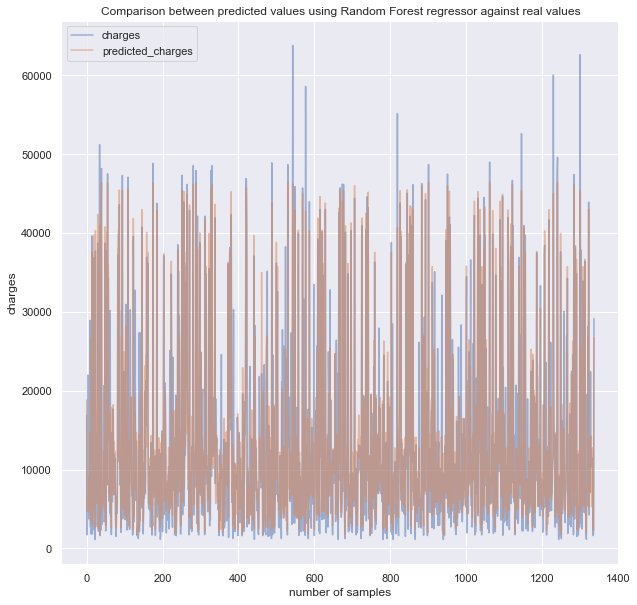

In [44]:
df_insurance['predicted_charges'] = rfr_model1.predict(X)
df_insurance[['charges','predicted_charges']].plot(alpha = 0.5, figsize = (10,10))
plt.xlabel('number of samples')
plt.ylabel('charges')
plt.title('Comparison between predicted values using Random Forest regressor against real values')

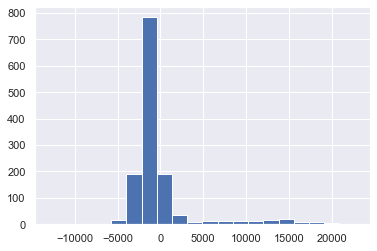

In [45]:
df_insurance['svr_residue'] = df_insurance['charges'] - df_insurance['predicted_charges']
df_insurance.svr_residue.hist(bins = 20)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Comparison between predicted values against real values using RFR')

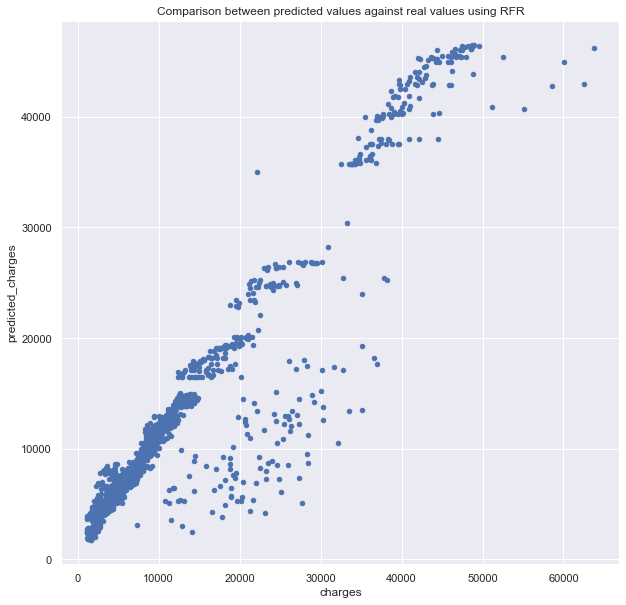

In [46]:
df_insurance.plot.scatter(x = 'charges', y = 'predicted_charges', figsize = (10,10))
plt.title('Comparison between predicted values against real values using RFR')

## Saving the model for future use

The codes below are from Brownlee (2016). 

In [48]:
import pickle

# Save the rfr_model to disk
filename = 'finalized_model1.sav'
pickle.dump(rfr_model1, open(filename,'wb'))

In [49]:
# Load the model from disk
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.8892821195342517


# References

Bhandari, A 2020, *Feature scaling for machine learning: understanding the difference between normalisation vs standardization*, Analytics Vidhya, viewed 15 February 2021, <https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/>

Brownlee, J 2016, *Save and load machine learning models in Python with scikit-learn*, Machine Learning Mastry, 8 June 2016, viewed 17 Feb 2021, <https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/>.

Choi, M 2018, *Medical cost personal datasets*, Kaggle, viewed 15 February 2021, <https://www.kaggle.com/mirichoi0218/insurance>  

# Appendix:

## Feature importance score and model performance

The feature importance graph below corroborated the heatmap produced in 3.6.1 regarding the important features for our models. 

We will try to fit the model with only 3 most important features and assess whether the model performance improved. 

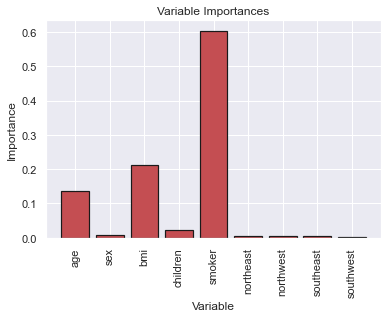

In [50]:
# Get numerical feature importances
X_list = list(X.columns)
importances = list(rfr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for feature, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x:x[1], reverse = True)

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, X_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [51]:
# We will store only three important features from the data into the variable X1

X1 = pd.DataFrame(np.c_[df_insurance.age, df_insurance.bmi, 
                      df_insurance.smoker], columns=['age', 'bmi',  
                      'smoker'])

X1.head()

,age,bmi,smoker
0,19.0,27.900,1.0
1,18.0,33.770,0.0
2,28.0,33.000,0.0
3,33.0,22.705,0.0
4,32.0,28.880,0.0


In [52]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1,y, random_state=42)
print('Training dataset: X1_train=', X1_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X1_test=', X1_test.shape, ', y_test', y_test.shape)

Training dataset: X1_train= (1002, 3) , y_train (1002,)
Testing dataset: X1_test= (335, 3) , y_test (335,)


In [53]:
rfr.fit(X1_train, y_train)

RandomForestRegressor(random_state=0)

In [54]:
rfr_model2 = RandomForestRegressor(random_state=0) 

In [55]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random2 = RandomizedSearchCV(estimator = rfr_model2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rfr_random2.fit(X1_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [56]:
# We can view the best parameters from fitting the random search
rfr_random2.best_params_

{'n_estimators': 100,
 'min_samples_split': 13,
 'min_samples_leaf': 17,
 'max_depth': 10}

In [57]:
# RandomizedSearchCV allowed us to narrow down the range for each hyperparameter. Now that we know where to
# concentrate our search, we can explicitly specify every combination of settings to try using GridSearchCV. 

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,5,10, 15],
    'min_samples_leaf': [16,17,18,19],
    'min_samples_split': [12,13,14],
    'n_estimators': [80, 90, 100, 150]
}

# Instantiate the grid search model
rfr_search2 = GridSearchCV(estimator = rfr_model2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search model
rfr_search2.fit(X1_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   46.6s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_leaf': [16, 17, 18, 19],
                         'min_samples_split': [12, 13, 14],
                         'n_estimators': [80, 90, 100, 150]},
             verbose=2)

In [58]:
# We can view the best parameters from fitting the Grid search
rfr_search2.best_params_

{'max_depth': 5,
 'min_samples_leaf': 17,
 'min_samples_split': 12,
 'n_estimators': 90}

In [59]:
# We then assign the values of the hyperparameters into our model
rfr_model2 = rfr_search2.best_estimator_
rfr_model2

RandomForestRegressor(max_depth=5, min_samples_leaf=17, min_samples_split=12,
                      n_estimators=90, random_state=0)

In [60]:
# Fitting the model after hyperparameter tuning:
rfr_model2.fit(X1_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=17, min_samples_split=12,
                      n_estimators=90, random_state=0)

In [61]:
#Prediction in the training dataset
y_rfr_train_predict3 = rfr.predict(X1_train)

# Prediction in the training dataset using tuned hyperparameter:
y_rfr_train_predict4 = rfr_model2.predict(X1_train)

# Prediction in the testing dataset 
y_rfr_test_predict3 = rfr.predict(X1_test) 

# Prediction in the testing dataset using tuned hyperparameter
y_rfr_test_predict4 = rfr_model2.predict(X1_test)

# Getting the RMSE scores
RMSE_training3 = np.sqrt(mean_squared_error(y_train, y_rfr_train_predict3))
RMSE_training4 = np.sqrt(mean_squared_error(y_train, y_rfr_train_predict4))

RMSE_test3 =np.sqrt(mean_squared_error(y_test, y_rfr_test_predict3))
RMSE_test4 =np.sqrt(mean_squared_error(y_test, y_rfr_test_predict4))

# Getting the R-squared scores
from sklearn.metrics import r2_score

R2_training3 = r2_score(y_train, y_rfr_train_predict3)
R2_training4 = r2_score(y_train, y_rfr_train_predict4)

R2_test3 = r2_score(y_test, y_rfr_test_predict3)
R2_test4 = r2_score(y_test, y_rfr_test_predict4)

print('Baseline:')
print('The naive RMSE baseline is ', RMSE_naive)
print()
print('RMSE score')
print('Training data:')
improvement_baseline1 = 100*abs(RMSE_training1 - RMSE_naive)/RMSE_naive
print('The model performance (before hyperparameter tuning) in training dataset is ', RMSE_training3)
print('It has an improvement over baseline of', round(improvement_baseline1, 2), '%.')
improvement_baseline2 = 100*abs(RMSE_training2 - RMSE_naive)/RMSE_naive
print('The model performance (after hyperparameter tuning) in training dataset is ', RMSE_training4)
print('It has an improvement over baseline of', round(improvement_baseline2, 2), '%.')
print()
print('RMSE score')
print('Testing data:')
improvement_baseline3 = 100*abs(RMSE_test1 - RMSE_naive)/RMSE_naive
print('The model performance (before hyperparameter tuning) in testing dataset is ', RMSE_test3)
print('It has an improvement over baseline of', round(improvement_baseline3, 2), '%.')
improvement_baseline4 = 100*abs(RMSE_test2 - RMSE_naive)/RMSE_naive
print('The model performance (after hyperparameter tuning) in testing dataset is ', RMSE_test4)
print('It has an improvement over baseline of', round(improvement_baseline4, 2), '%.')
print()
print('R-squared score')
print('Training data:')
print('The model performance (before hyperparameter tuning) in training dataset is ', R2_training3)
print('The model performance (after hyperparameter tuning) in training dataset is ', R2_training4)
print()
print('R-squared score')
print('Testing data:')
print('The model performance (before hyperparameter tuning) in testing dataset is ', R2_test3)
print('The model performance (after hyperparameter tuning) in testing dataset is ', R2_test4)

Baseline:
The naive RMSE baseline is  13172.959408396111

RMSE score
Training data:
The model performance (before hyperparameter tuning) in training dataset is  2149.7474857500843
It has an improvement over baseline of 85.94 %.
The model performance (after hyperparameter tuning) in training dataset is  4403.409264330352
It has an improvement over baseline of 68.77 %.

RMSE score
Testing data:
The model performance (before hyperparameter tuning) in testing dataset is  4977.123131946971
It has an improvement over baseline of 63.83 %.
The model performance (after hyperparameter tuning) in testing dataset is  4451.478794829967
It has an improvement over baseline of 66.78 %.

R-squared score
Training data:
The model performance (before hyperparameter tuning) in training dataset is  0.9664102277563184
The model performance (after hyperparameter tuning) in training dataset is  0.8590677896636201

R-squared score
Testing data:
The model performance (before hyperparameter tuning) in testing dat

Text(0.5, 1.0, 'Comparison between predicted values using Random Forest regressor against real values')

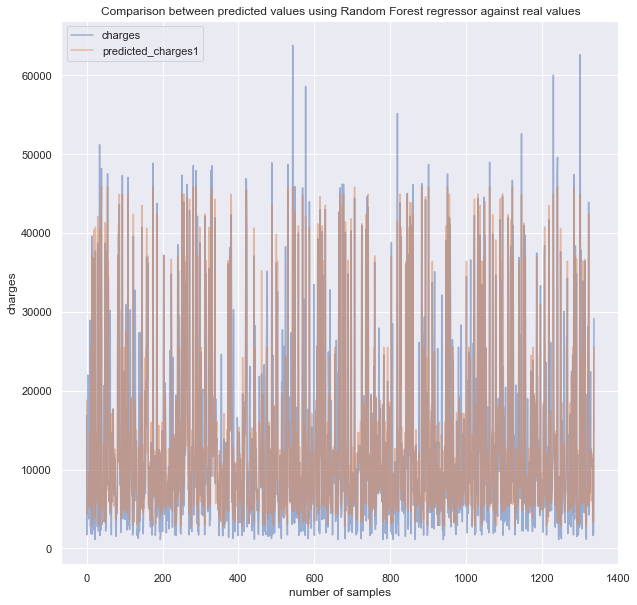

In [62]:
df_insurance['predicted_charges1'] = rfr_model2.predict(X1)
df_insurance[['charges','predicted_charges1']].plot(alpha = 0.5, figsize = (10,10))
plt.xlabel('number of samples')
plt.ylabel('charges')
plt.title('Comparison between predicted values using Random Forest regressor against real values')

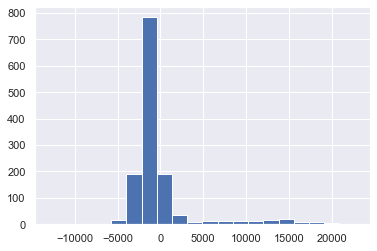

In [63]:
df_insurance['svr_residue1'] = df_insurance['charges'] - df_insurance['predicted_charges1']
df_insurance.svr_residue.hist(bins = 20)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Comparison between predicted values against real values using RFR')

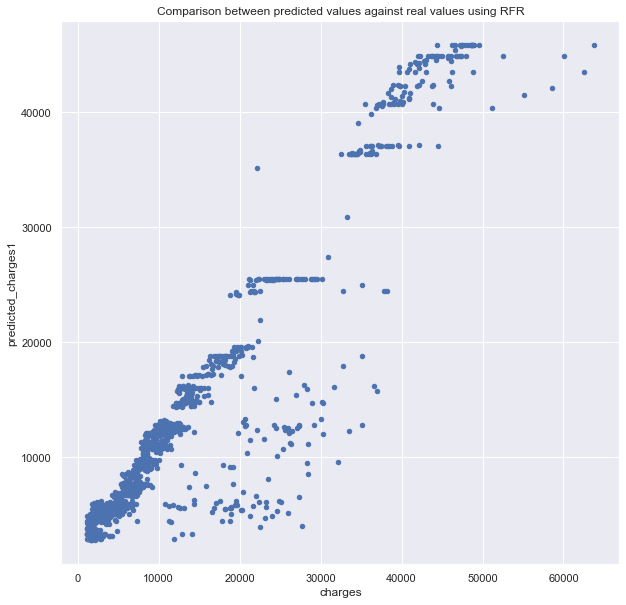

In [64]:
df_insurance.plot.scatter(x = 'charges', y = 'predicted_charges1', figsize = (10,10))
plt.title('Comparison between predicted values against real values using RFR')

In [65]:
models_performance_dict = []

baseline_performance = {
    'name': 'Naive_baseline',
    'model': baseline,
    'RMSE': RMSE_naive}
models_performance_dict.append(baseline_performance)

model1_performance = {
    'name': 'RFR Model 1',
    'model': rfr_model1,
    'RMSE': RMSE_test2}
models_performance_dict.append(model1_performance)

model2_performance = {
    'name': 'RFR Model 2',
    'model': rfr_model2,
    'RMSE': RMSE_test4}
models_performance_dict.append(model2_performance)

pd.DataFrame(models_performance_dict)

,name,model,RMSE
0,Naive_baseline,13082.3,13172.959408
1,RFR Model 1,"(DecisionTreeRegressor(max_depth=95, max_featu...",4375.409489
2,RFR Model 2,"(DecisionTreeRegressor(max_depth=5, max_featur...",4451.478795


Based on the above, RFR performed slighty better with all the features included. Accordingly, we will keep all the features. 